In [1]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


Bad key "text.kerning_factor" on line 4 in
C:\Users\Yousef\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


In [4]:
X,y = datasets.make_regression(n_samples=100,n_features=1,noise=20,random_state = 0)

In [5]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 0)

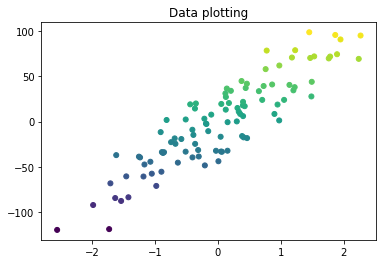

In [16]:
plt.figure()
plt.title("Data plotting")
plt.scatter(X[:,0],y,c=y,s=25)
plt.show()

In [53]:
class Linear_Regression:
    def __init__(self,lr=0.01,n_iter=100):
        self.lr = lr
        self.n_iter = n_iter
        self.weights = None
        self.bias = 0
    def fit(self,X,y):
        n_samples,n_features = X.shape
        self.weights = np.random.randn(n_features)
        self.bias = 0
        
        for _ in range(self.n_iter):
            y_pred = np.dot(X,self.weights)+self.bias
            dw = np.dot(X.T,(y_pred-y))*(1/n_samples)
            db = np.sum(y_pred-y)*(1/n_samples)
            self.weights -= self.lr*dw
            self.bias -= self.lr*db
    
    def predict(self,X):
        y_pred = np.dot(X,self.weights)+self.bias
        return y_pred

In [54]:
def mse(y_act,y_pred):
    return np.mean((y_pred-y_act)**2)

In [93]:
Regressor = Linear_Regression(lr=0.3)

In [94]:
Regressor.fit(X_train,y_train)
predictions = Regressor.predict(X_test)
y_pred_line = Regressor.predict(X)

In [95]:
print(mse(y_test,predictions))

388.58893558748576


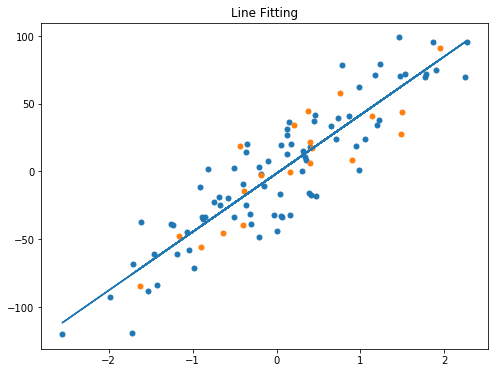

In [96]:
fig = plt.figure(figsize=(8,6))
m1 = plt.scatter(X_train,y_train,s=25)
m2 = plt.scatter(X_test,y_test,s=25)
plt.plot(X,y_pred_line)
plt.title("Line Fitting")
plt.show()